In [6]:
!pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     --------- ----------------------------- 71.7/294.9 kB 1.9 MB/s eta 0:00:01
     ------------------------------ ------- 235.5/294.9 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install scikit-learn

     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.1 MB 3.2 MB/s eta 0:00:04
      --------------------------------------- 0.2/11.1 MB 2.8 MB/s eta 0:00:04
     - -------------------------------------- 0.5/11.1 MB 3.8 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/11.1 MB 5.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.5/11.1 MB 6.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/11.1 MB 7.9 MB/s eta 0:00:02
     -------- ------------------------------- 2.4/11.1 MB 8.0 MB/s eta 0:00:02
     ---------- ----------------------------- 2.8/11.1 MB 7.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.3/11.1 MB 8.4 MB/s eta 0:00:01
     ------------- -------------------------- 3.8/11.1 MB 8.6 MB/s eta 0:00:01
     -------------- ------------------------- 4.0/11.1 MB 8.5 MB/s eta 0:00:01
     ---------------- ----------------------- 4.5/11.1 MB 8


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')

In [12]:
# Configurar estilo de visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [18]:
# Cargar los datos
df = pd.read_csv('heart_cleveland_upload.csv')

In [19]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [20]:
# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [21]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   

In [22]:
# Verificar valores nulos
print("\nVerificación de valores nulos:")
print(df.isnull().sum())


Verificación de valores nulos:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [23]:
# Verificar la distribución de la variable objetivo
print("\nDistribución de la variable objetivo (condición cardíaca):")
print(df['condition'].value_counts())
print(f"Proporción de casos positivos: {df['condition'].mean():.2%}")


Distribución de la variable objetivo (condición cardíaca):
condition
0    160
1    137
Name: count, dtype: int64
Proporción de casos positivos: 46.13%


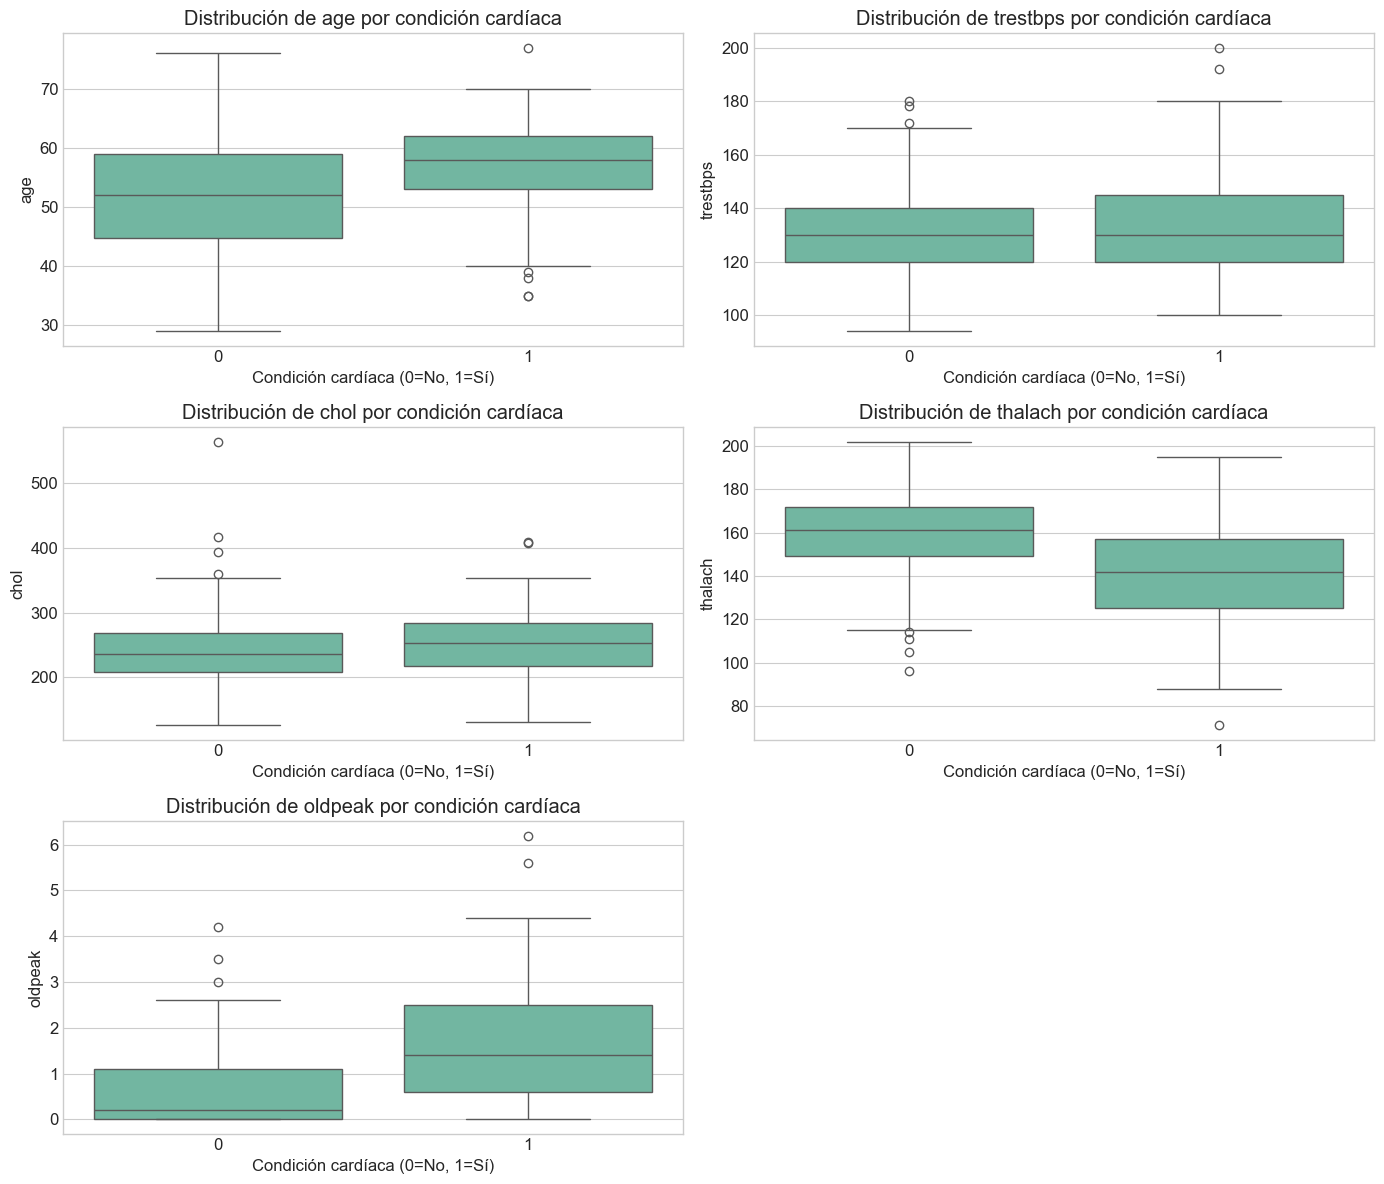

In [25]:
# Explorando la relación entre variables numéricas y la condición cardíaca
plt.figure(figsize=(14, 12))
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='condition', y=feature, data=df)
    plt.title(f'Distribución de {feature} por condición cardíaca')
    plt.xlabel('Condición cardíaca (0=No, 1=Sí)')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('boxplots_variables_numericas.png')
plt.show()

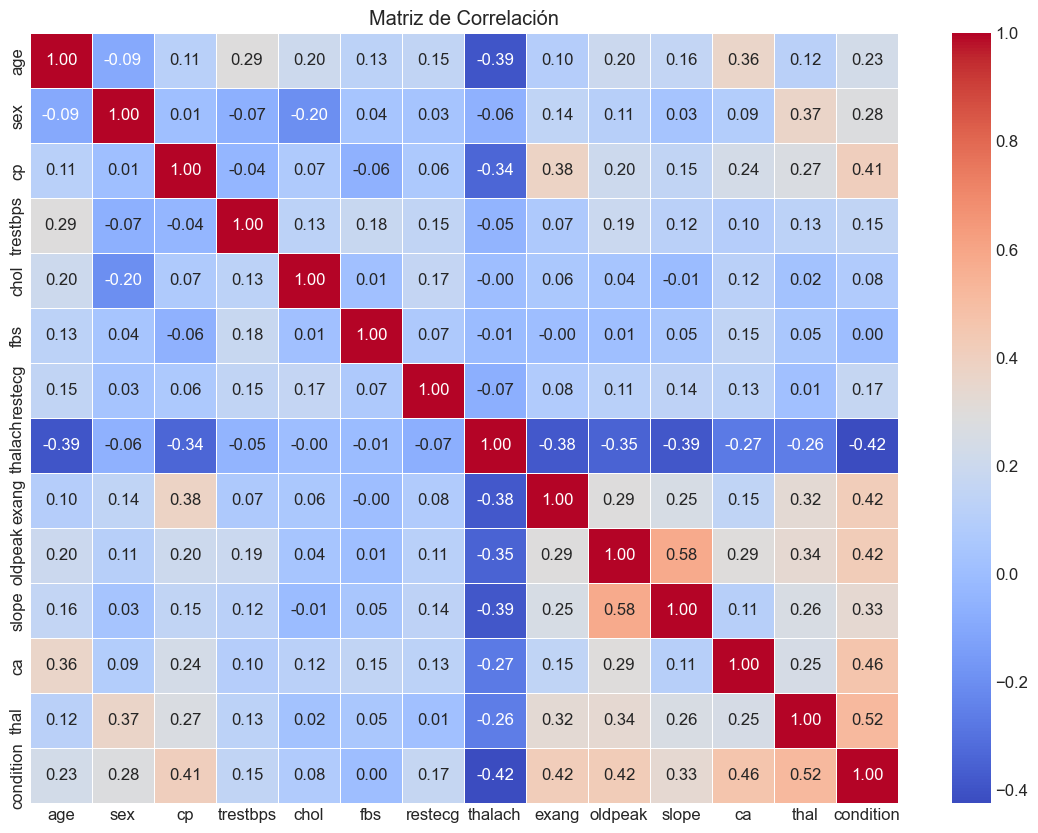

In [26]:
# Matrices de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.savefig('matriz_correlacion.png')
plt.show()

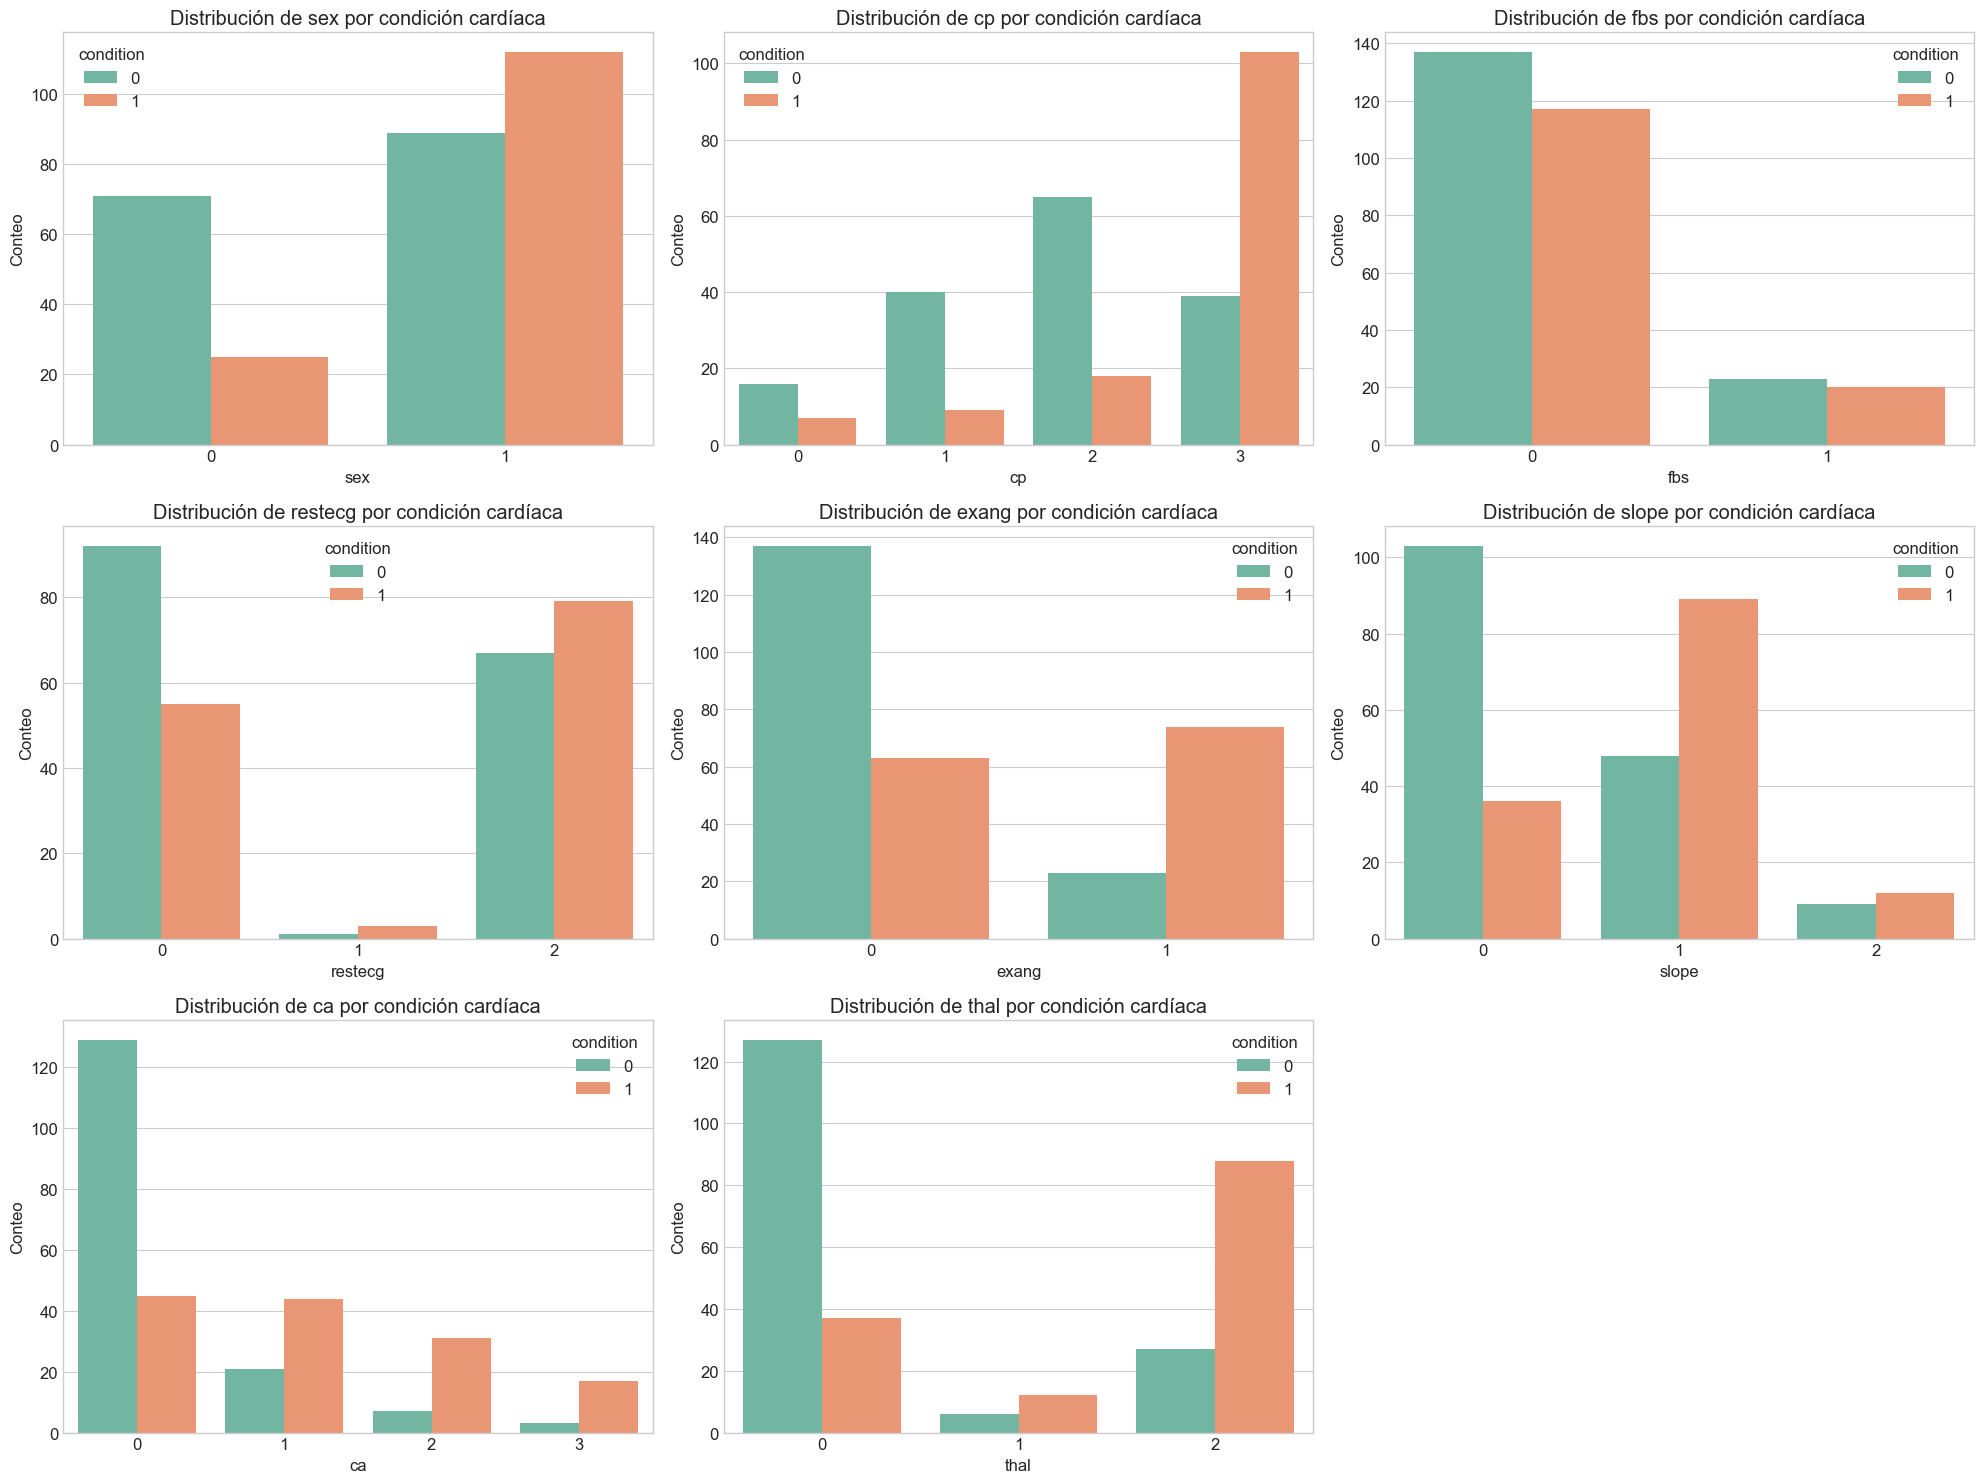

In [27]:
# Analizando características categóricas
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='condition', data=df)
    plt.title(f'Distribución de {feature} por condición cardíaca')
    plt.xlabel(feature)
    plt.ylabel('Conteo')

plt.tight_layout()
plt.savefig('countplots_variables_categoricas.png')
plt.show()

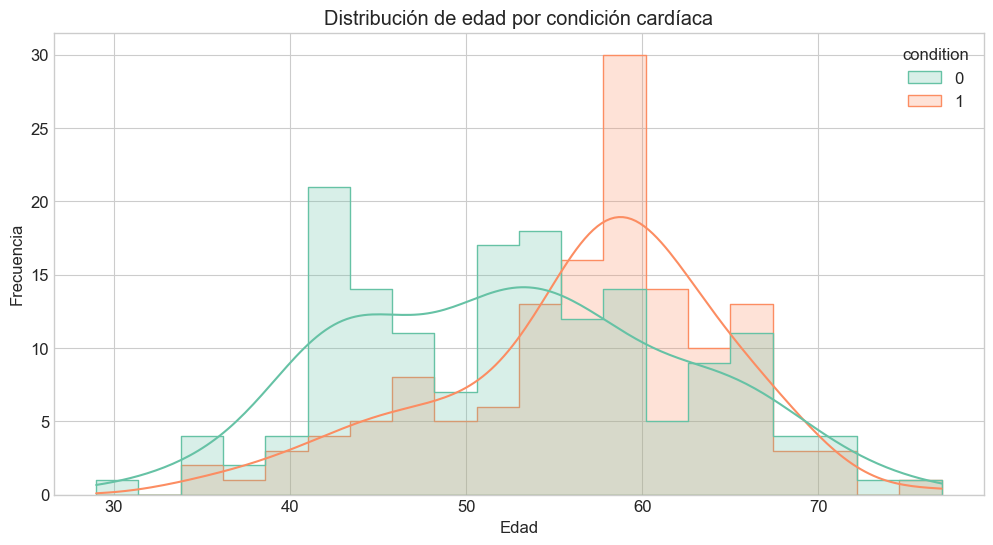

In [28]:
# Distribución de la edad por condición cardíaca
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='condition', element='step', kde=True, bins=20)
plt.title('Distribución de edad por condición cardíaca')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('distribucion_edad.png')
plt.show()

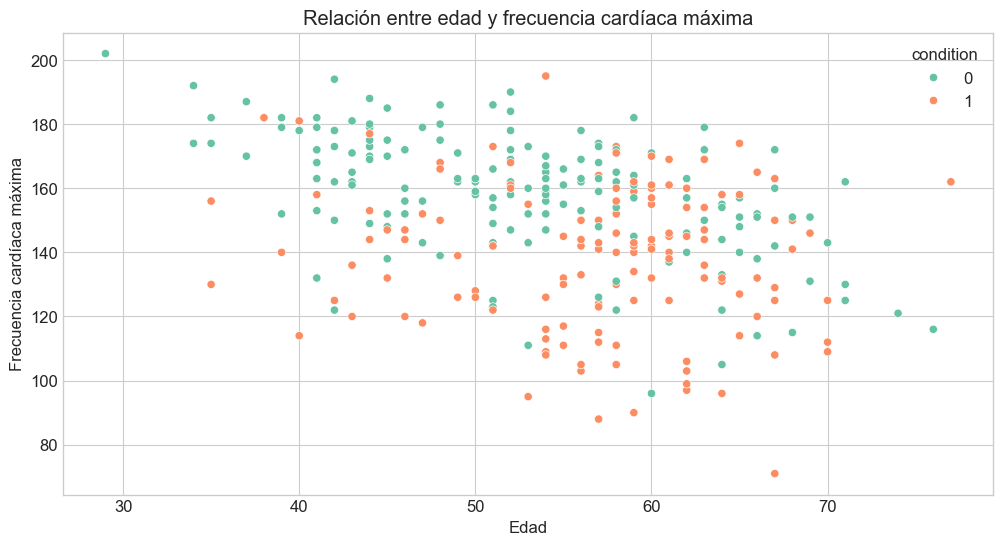

In [29]:
# Analizando la relación entre thalach (frecuencia cardíaca máxima) y la edad
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='thalach', hue='condition', data=df)
plt.title('Relación entre edad y frecuencia cardíaca máxima')
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca máxima')
plt.savefig('edad_vs_frecuencia_cardiaca.png')
plt.show()

# 2. PREPROCESAMIENTO DE DATOS

In [30]:
# Detección de outliers con método Z-score
def detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    return filtered_entries

# Verificamos outliers en variables numéricas
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
outliers_mask = pd.DataFrame()

for feature in numerical_features:
    outliers_mask[feature] = detect_outliers(df, feature)
    print(f"Outliers en {feature}: {(~outliers_mask[feature]).sum()}")

# Filtramos outliers (solo para variables donde es apropiado)
# En este caso, no eliminaremos outliers para mantener la integridad del dataset clínico
# df_no_outliers = df[np.all(outliers_mask, axis=1)]
# print(f"Filas sin outliers: {df_no_outliers.shape[0]} de {df.shape[0]} originales")

# Separamos características y variable objetivo
X = df.drop('condition', axis=1)
y = df['condition']

# Escalamos las variables numéricas
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

Outliers en age: 0
Outliers en trestbps: 2
Outliers en chol: 4
Outliers en thalach: 1
Outliers en oldpeak: 2


# 3. SELECCIÓN DE CARACTERÍSTICAS

In [31]:
# Utilizamos SelectKBest para seleccionar las características más relevantes
selector = SelectKBest(f_classif, k=8)  # Seleccionamos las 8 mejores características
X_new = selector.fit_transform(X, y)

# Mostrar las puntuaciones de importancia de las características
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})

print("\nPuntuaciones de importancia de características:")
print(feature_scores.sort_values(by='Score', ascending=False))


Puntuaciones de importancia de características:
     Feature       Score
12      thal  109.629171
11        ca   80.577866
9    oldpeak   64.677208
7    thalach   64.589855
8      exang   63.680253
2         cp   59.241915
10     slope   36.804300
1        sex   24.798347
0        age   16.038097
6    restecg    8.394987
3   trestbps    7.117646
4       chol    1.913800
5        fbs    0.002959


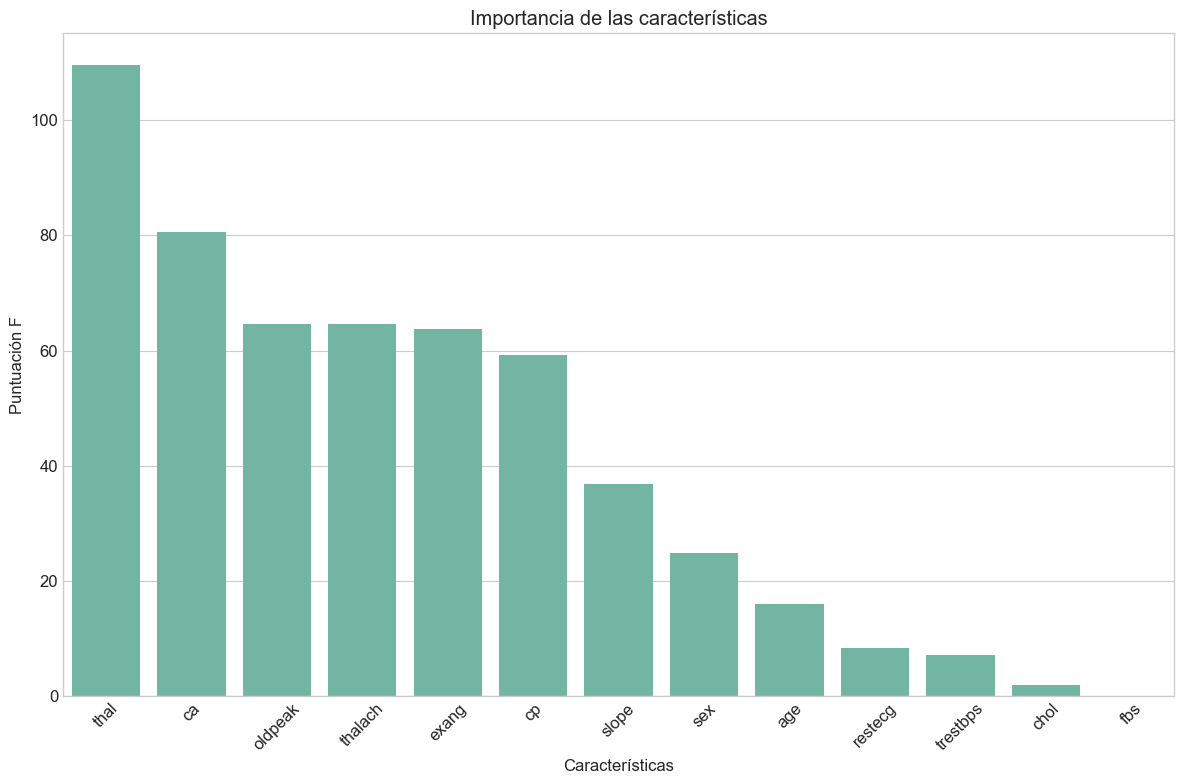

In [34]:
# Visualizamos la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Score', data=feature_scores.sort_values(by='Score', ascending=False))
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Puntuación F')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('importancia_caracteristicas.png')
plt.show()

In [36]:
# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


In [37]:
# Utilizamos solo las características seleccionadas
X_selected = X[selected_features]

# 4. DIVISIÓN DE DATOS

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (207, 8)
Tamaño del conjunto de prueba: (90, 8)


# 5. ENTRENAMIENTO DEL MODELO

In [39]:
# Configuramos la búsqueda de hiperparámetros con GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear soporta tanto l1 como l2
    'max_iter': [1000]
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Mostrar mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_:.4f}")

# Obtener el mejor modelo
best_model = grid_search.best_estimator_


Mejores hiperparámetros encontrados:
{'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación de validación cruzada: 0.9021


# 6. EVALUACIÓN DEL MODELO

In [40]:
# Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.92      0.79      0.85        42

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



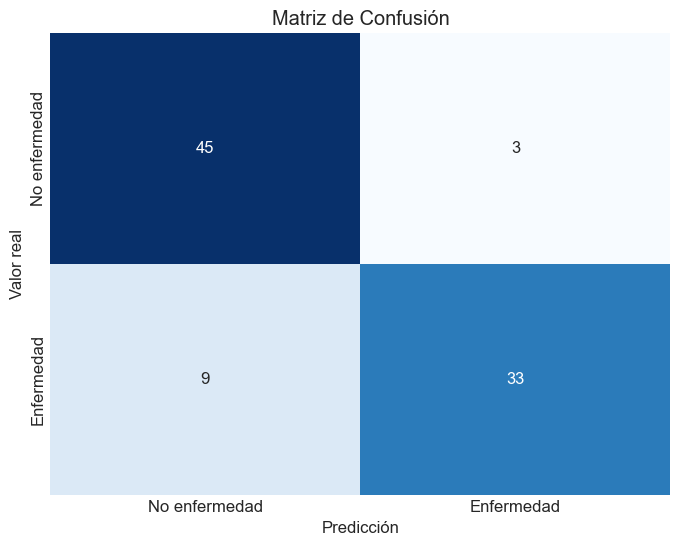

In [41]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No enfermedad', 'Enfermedad'], 
            yticklabels=['No enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.savefig('matriz_confusion.png')
plt.show()

In [42]:
# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC: {roc_auc:.4f}")


AUC-ROC: 0.9196


# 7. VISUALIZACIÓN DE RESULTADOS

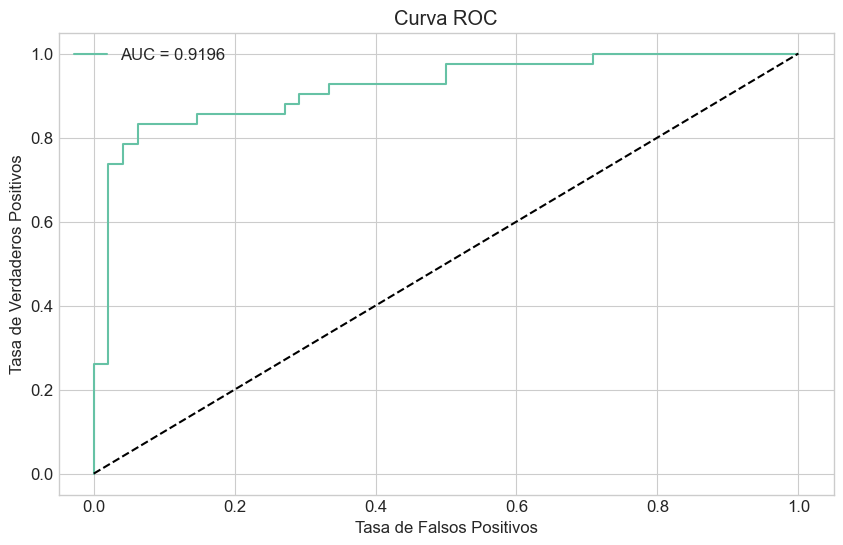

In [43]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.savefig('curva_roc.png')
plt.show()

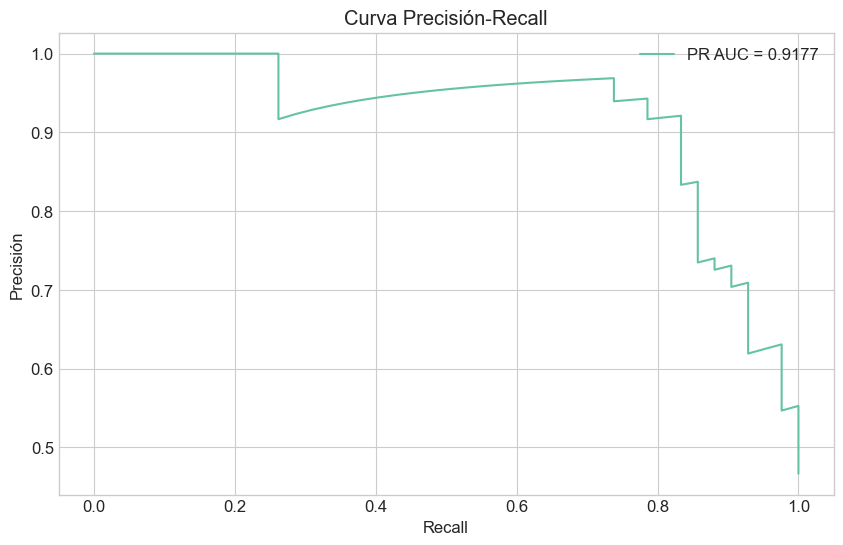

In [44]:
# Curva Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend()
plt.savefig('curva_precision_recall.png')
plt.show()

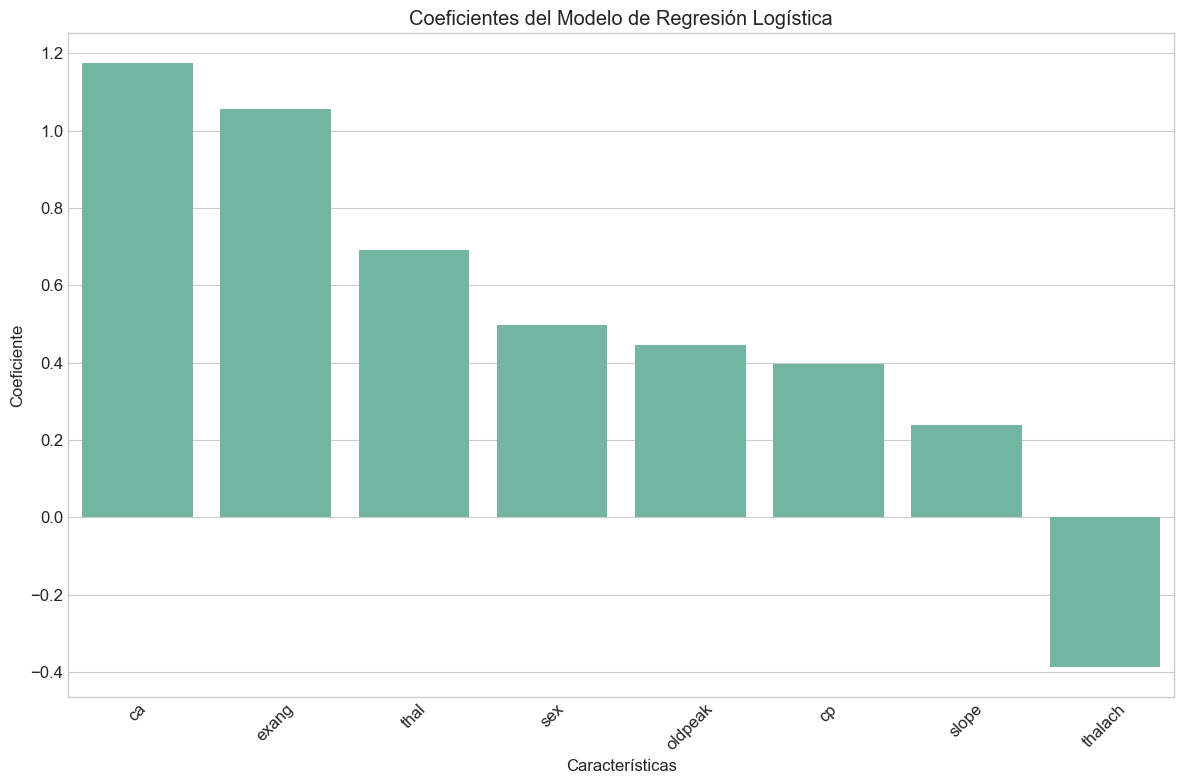

In [45]:
# Coeficientes del modelo
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': best_model.coef_[0]
})

coef_df = coef_df.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Características')
plt.ylabel('Coeficiente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('coeficientes_modelo.png')
plt.show()

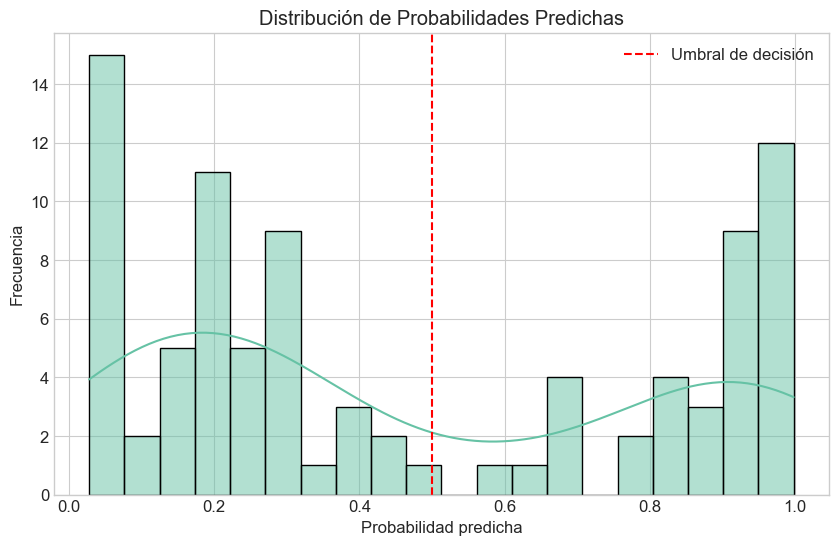

In [46]:
# Distribución de probabilidades predichas
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, bins=20, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Umbral de decisión')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades Predichas')
plt.legend()
plt.savefig('distribucion_probabilidades.png')
plt.show()